In [5]:
from Ownkey import API_Key
import requests
import pandas as pd

print(API_Key)

In [2]:
ticker = "X:LTCUSD"
multiplier = 1
timespan = "day"
start_date = "2024-01-09"
end_date = "2024-12-10"

url = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/{multiplier}/{timespan}/{start_date}/{end_date}?apiKey={API_Key}"

#print(url)

response = requests.get(url)
data = response.json()

if "results" in data:
    df = pd.DataFrame(data["results"])

    df['t'] = pd.to_datetime(df['t'], unit='ms')

    df.rename(columns={'t': 'Date', 'o': 'Open', 'h': 'High', 'l': 'Low', 'c': 'Close', 'v': 'Volume'}, inplace=True)

    print(df.head())
else:
    print("Error fetching data:", data)

          Volume       vw   Open  Close   High    Low       Date      n
0  311938.208957  66.0140  67.80  67.01  67.87  64.21 2024-01-09  59945
1  345848.796478  67.6751  67.02  70.06  71.26  65.00 2024-01-10  66144
2  377895.832834  72.0520  70.13  71.88  74.66  69.54 2024-01-11  65908
3  516803.268291  73.8334  71.91  72.94  77.17  70.41 2024-01-12  91680
4  184399.766102  71.9488  72.96  72.00  73.60  71.00 2024-01-13  47615


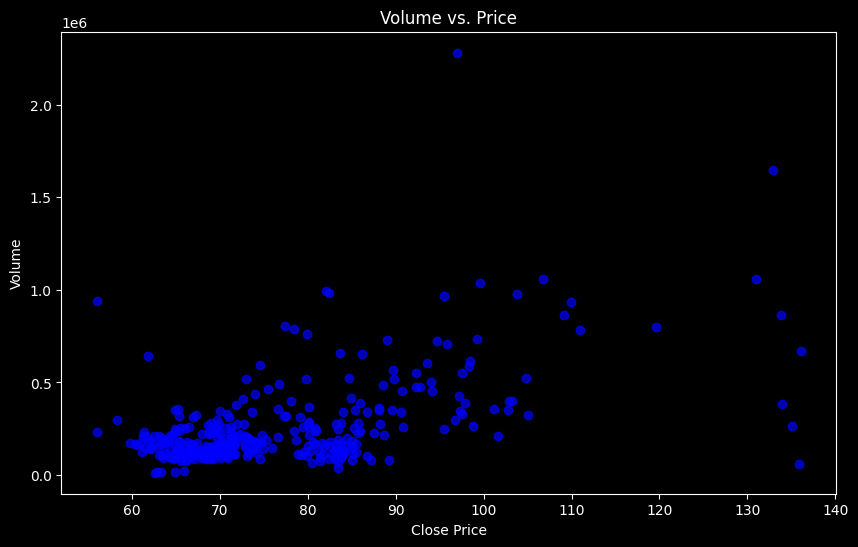

In [4]:
import matplotlib.pyplot as plt

# Scatter plot of Volume vs Close Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Close'], df['Volume'], alpha=0.7, color='blue')
plt.style.use('dark_background')
plt.title('Volume vs. Price')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.show()